In [19]:
import numpy as np
import pandas as pd

In [20]:
X = pd.read_csv('../data/processed/X.csv')

In [21]:
X.head()

,domestic_gross,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,760507625.0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,936662225.0,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,309420425.0,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,200074175.0,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,448139099.0,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [22]:
y = X['worldwide_gross']

In [23]:
X = X.drop('worldwide_gross', axis=1)

In [24]:
X = X.drop('domestic_gross', axis=1)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)

In [26]:
print(len(X_train))
print(len(X_test))

2462
1642


In [27]:
len(X)

4104

In [28]:
print(len(y_train))
print(len(y_test))

2462
1642


Ocuparemos _Regression Lasso_ que se encuentra en el modulo de _Lineal Models_

In [29]:
from sklearn.linear_model import Lasso 
model = Lasso()

In [30]:
model.fit(X_train,y_train)

Lasso()

In [31]:
predicted = model.predict(X_test)

In [32]:
predicted.shape

(1642,)

(array([[2.000e+00, 1.273e+03, 2.800e+02, 5.500e+01, 2.400e+01, 6.000e+00,
         0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 1.313e+03, 2.440e+02, 4.900e+01, 1.700e+01, 1.400e+01,
         2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]]),
 array([-3.75758404e+08, -1.17420996e+08,  1.40916411e+08,  3.99253818e+08,
         6.57591225e+08,  9.15928632e+08,  1.17426604e+09,  1.43260345e+09,
         1.69094085e+09,  1.94927826e+09,  2.20761567e+09]),
 <a list of 2 BarContainer objects>)

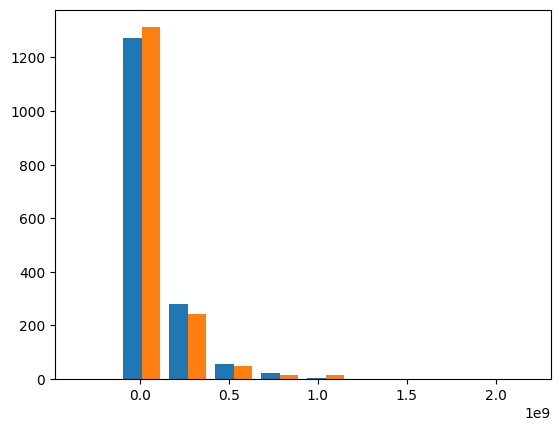

In [33]:
import matplotlib.pyplot as plt
plt.hist([predicted,y_test])

Evaluación más fina del comportamiento del modelo.

Los estimadores y las funcion es de sklearn vienen con  el máximo de argumentos con valores por defecto que suelen ser las mejores opciones si no se tiene algún conocimiento particular del problema. Para este caso la función _estimator.score_ ya viene con una de las métricas de _sklearn.metrics_, que es la métrica sklearn.metric.r2_score.

* Entre más nor acerquemos a 1, mejor habrá sido nuestra regresión. 
* Tener un score sobre 0.7, 0.8 ya se podría considerar bueno. 

In [34]:
model.score(X_test,y_test)

0.87940402524716

In [36]:
residuals = y_test - predicted

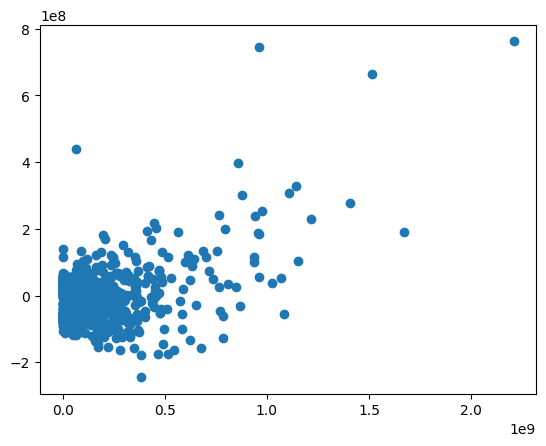

In [37]:
plt.scatter(y_test,residuals)

In [38]:
residuals = y_test - predicted

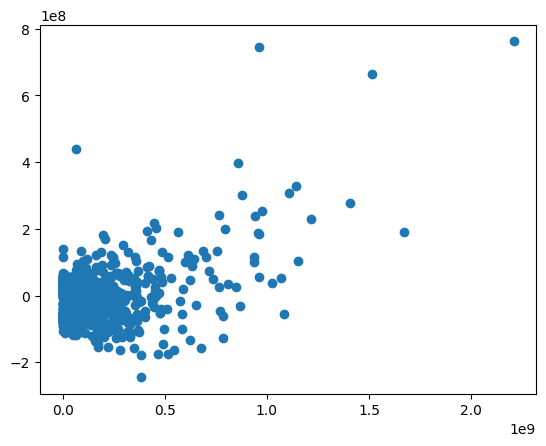

In [39]:
# Visualización de los errores absolutos (dolares)
plt.scatter(y_test, residuals)

In [40]:
# Revisaremos los errores en %
ap_residuals = np.abs(residuals) / y_test

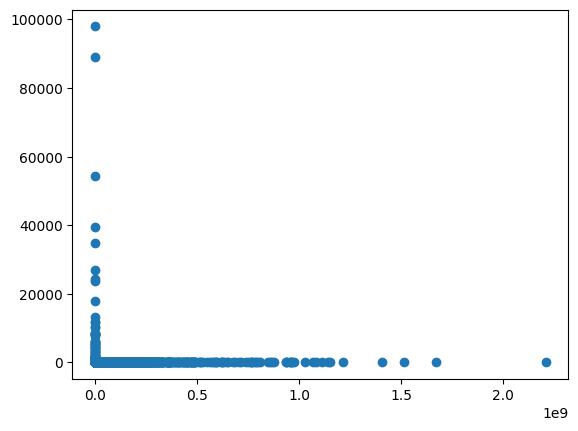

In [41]:
plt.scatter(y_test, ap_residuals)

In [42]:
# Ocuparemos una escala algoritmica para compactar los datos
lap_residualos = np.log(ap_residuals)

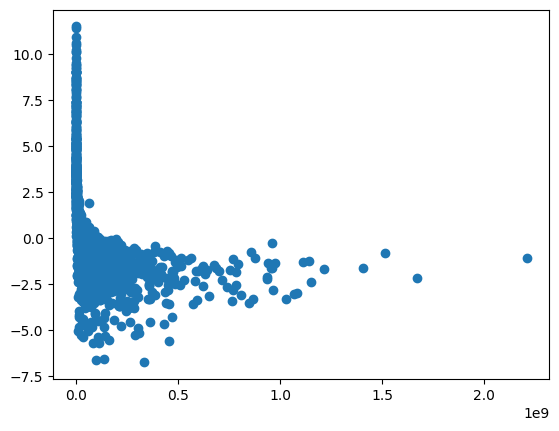

In [43]:
plt.scatter(y_test, lap_residualos)

Notamos que las películas de bajo presupuesto se escapan más. 
* Por último graficaremos de manera n úmerrica los errores

AttributeError: Polygon.set() got an unexpected keyword argument 'normed'

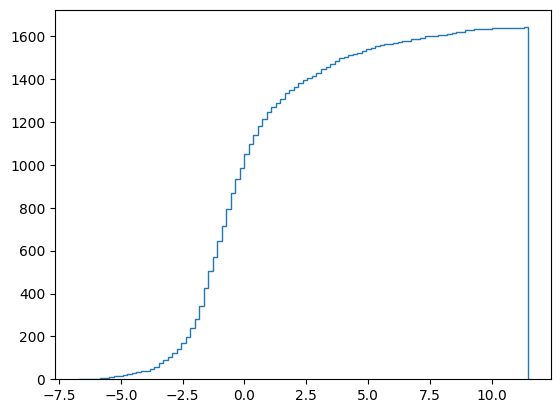

In [46]:
plt.hist(lap_residualos, bins=100, normed=1, histtype='step', cumulative=True)

In [51]:
#No funciona, y al agregar normed=1 en el hist. Sale error. 
# plt.hist(lap_residualos, bins=100, histtype='step', cumulative=True);
# plt.axis([-2,0,0,1])
# np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))